# LFP example: regression vs estimation of difference
## Make and visualize model oscillation power
40 trials of "theta power" is generated for every animal. It is drawn randomly as a poisson process.

This is repeated for "stimulation" trials, but poisson rate is higher.

In [1]:
import altair as alt
from bayes_window import BayesWindow, models, BayesRegression, LMERegression, BayesConditions
from bayes_window.generative_models import generate_fake_lfp

try:
    alt.renderers.enable('altair_saver', fmts=['png'])
except Exception:
    pass

In [2]:
# Draw some fake data:
df, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=15, n_trials=30)

## Estimate posteriors for treatments

In [3]:
# Initialize:
window = BayesWindow(df=df, y='Power', #condition='stim',
                     group='mouse', 
                     treatment='stim')
# Fit:
estimation = BayesConditions(window).fit(dist_y='gamma')


n(Divergences) = 1


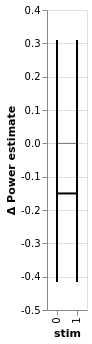

In [4]:
estimation.plot(color=':O')#.facet(column='mouse')

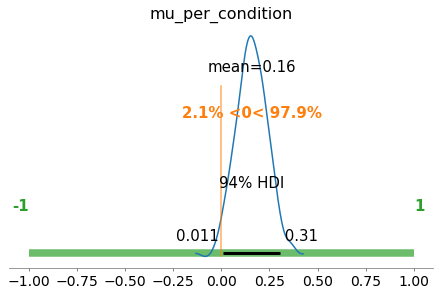

In [5]:
estimation.plot_BEST()

## Compare with regression approach

changing x to :Q


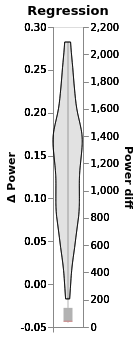

In [6]:
# Initialize:
# window = BayesWindow(df=df, y='Power', treatment='stim', group='mouse')
# Fit:
regression = BayesRegression(window).fit(model=models.model_hierarchical, add_group_intercept=True,
           add_group_slope=False, robust_slopes=False,
           do_make_change='subtract', dist_y='gamma')
(regression.chart + regression.chart_posterior_kde).properties(title='Regression')

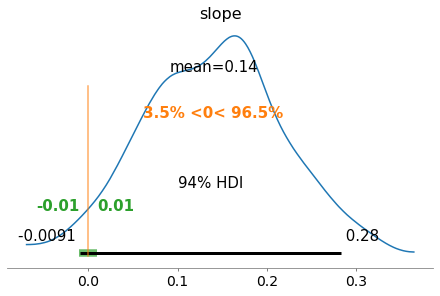

In [7]:
regression.plot_BEST()

## Evaluate sensitivity: CM

In [8]:

import numpy as np

from bayes_window import model_comparison, BayesWindow
from bayes_window.generative_models import generate_fake_lfp


### y=Power

In [9]:
# NBVAL_SKIP
# Note: Only works with single ys and single true_slopes
res = model_comparison.run_conditions(true_slopes=np.hstack([np.zeros(15),
                                                             np.tile(10, 15)]),
                                      n_trials=np.linspace(10, 70, 3).astype(int),
                                      ys=('Power',),
                                      methods=('bc_gamma','bw_gamma',),
                                      parallel=True)

  0%|          | 0/270 [00:00<?, ?it/s]

  4%|▍         | 12/270 [00:00<00:06, 39.01it/s]

  4%|▍         | 12/270 [00:19<00:06, 39.01it/s]

  9%|▉         | 24/270 [00:27<05:25,  1.32s/it]

 13%|█▎        | 36/270 [00:57<07:20,  1.88s/it]

 18%|█▊        | 48/270 [01:26<07:40,  2.07s/it]

 22%|██▏       | 60/270 [02:10<09:20,  2.67s/it]

 27%|██▋       | 72/270 [02:46<09:07,  2.77s/it]

 31%|███       | 84/270 [03:14<08:11,  2.64s/it]

 36%|███▌      | 96/270 [03:57<08:31,  2.94s/it]

 40%|████      | 108/270 [04:30<07:43,  2.86s/it]

 44%|████▍     | 120/270 [05:03<07:05,  2.84s/it]

 49%|████▉     | 132/270 [05:46<07:02,  3.06s/it]

 53%|█████▎    | 144/270 [06:19<06:14,  2.97s/it]

 58%|█████▊    | 156/270 [06:48<05:19,  2.80s/it]

 62%|██████▏   | 168/270 [07:26<04:57,  2.91s/it]

 67%|██████▋   | 180/270 [08:05<04:30,  3.01s/it]

 71%|███████   | 192/270 [08:36<03:44,  2.88s/it]

 76%|███████▌  | 204/270 [09:10<03:10,  2.88s/it]

 80%|████████  | 216/270 [09:51<02:43,  3.03s/it]

 84%|████████▍ | 228/270 [10:20<02:00,  2.86s/it]

 89%|████████▉ | 240/270 [11:04<01:32,  3.10s/it]

 93%|█████████▎| 252/270 [11:35<00:52,  2.93s/it]

 98%|█████████▊| 264/270 [12:06<00:16,  2.83s/it]

100%|██████████| 270/270 [12:06<00:00,  2.69s/it]

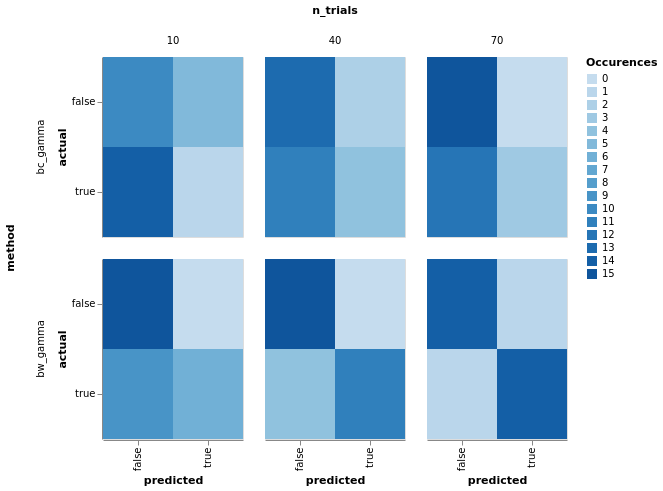

In [10]:
# NBVAL_SKIP
model_comparison.plot_confusion(
    model_comparison.make_confusion_matrix(res[res['y'] == 'Power'], ('method', 'y', 'randomness', 'n_trials')
                                           )).properties(width=140).facet(row='method', column='n_trials')

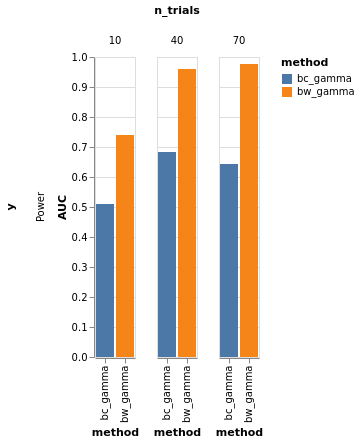

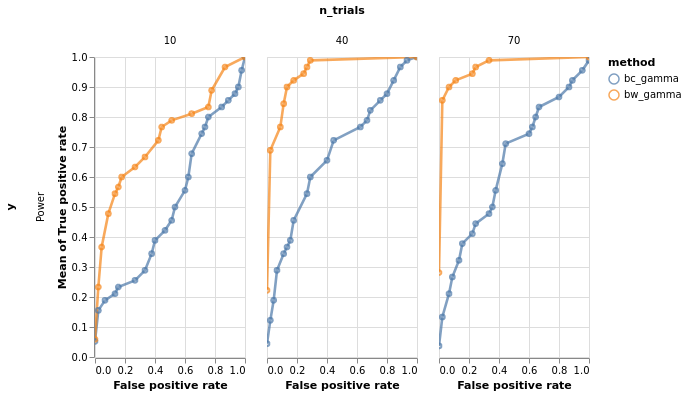

In [11]:
df = model_comparison.make_roc_auc(res, binary=False, groups=('method', 'y', 'n_trials'))

bars, roc = model_comparison.plot_roc(df)
bars.facet(column='n_trials', row='y').properties().display()
roc.facet(column='n_trials', row='y').properties()
# NBVAL_SKIP

### y=Log power

In [12]:
# NBVAL_SKIP
# Note: Only works with single ys and single true_slopes
res = model_comparison.run_conditions(true_slopes=np.hstack([np.zeros(15),
                                                             np.tile(10, 15)]),
                                      n_trials=np.linspace(10, 70, 3).astype(int),
                                      ys=('Log power',),
                                      methods=('bc_normal','bc_gamma','bc_student','bw_gamma',),
                                      parallel=True)

  0%|          | 0/270 [00:00<?, ?it/s]

  9%|▉         | 24/270 [00:50<08:35,  2.09s/it]

 13%|█▎        | 36/270 [02:00<14:18,  3.67s/it]

 18%|█▊        | 48/270 [03:03<15:40,  4.24s/it]

 22%|██▏       | 60/270 [04:47<20:16,  5.79s/it]

 27%|██▋       | 72/270 [05:52<18:43,  5.68s/it]

 31%|███       | 84/270 [07:01<17:40,  5.70s/it]

 36%|███▌      | 96/270 [08:39<18:43,  6.46s/it]

 40%|████      | 108/270 [09:58<17:35,  6.51s/it]

 44%|████▍     | 120/270 [10:59<15:09,  6.06s/it]

 49%|████▉     | 132/270 [12:32<15:07,  6.58s/it]

 53%|█████▎    | 144/270 [13:46<13:33,  6.46s/it]

 58%|█████▊    | 156/270 [14:49<11:33,  6.08s/it]

 62%|██████▏   | 168/270 [16:28<11:28,  6.75s/it]

 67%|██████▋   | 180/270 [17:33<09:31,  6.35s/it]

 71%|███████   | 192/270 [18:39<07:54,  6.08s/it]

 76%|███████▌  | 204/270 [20:15<07:19,  6.66s/it]

 80%|████████  | 216/270 [21:16<05:33,  6.18s/it]

 84%|████████▍ | 228/270 [22:19<04:08,  5.91s/it]

 89%|████████▉ | 240/270 [24:02<03:21,  6.72s/it]

 93%|█████████▎| 252/270 [25:07<01:53,  6.33s/it]

 98%|█████████▊| 264/270 [26:08<00:35,  5.95s/it]

100%|██████████| 270/270 [26:08<00:00,  5.81s/it]

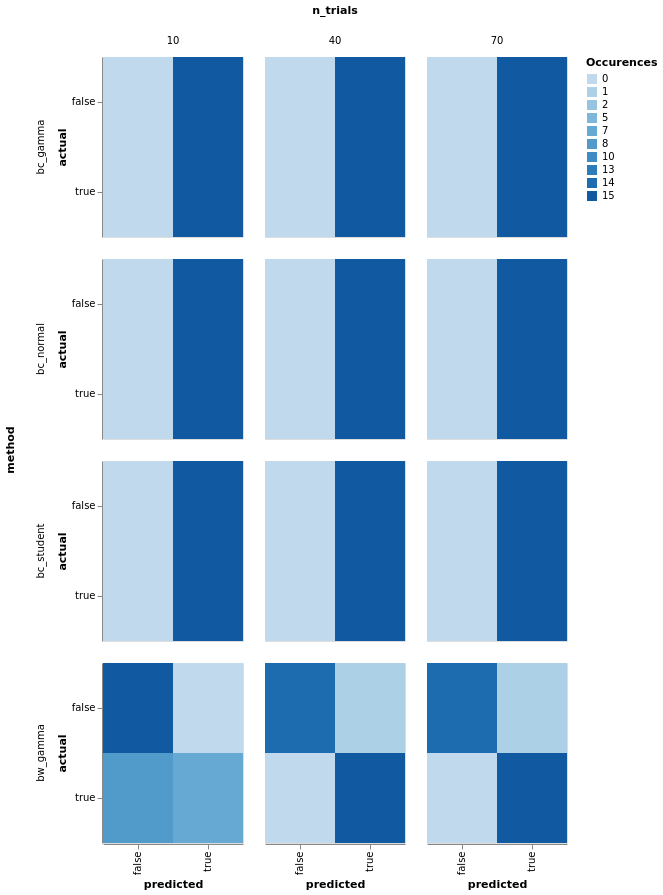

In [13]:
# NBVAL_SKIP
model_comparison.plot_confusion(
    model_comparison.make_confusion_matrix(res[res['y'] == 'Log power'], ('method', 'y', 'randomness', 'n_trials')
                                           )).properties(width=140).facet(row='method', column='n_trials')

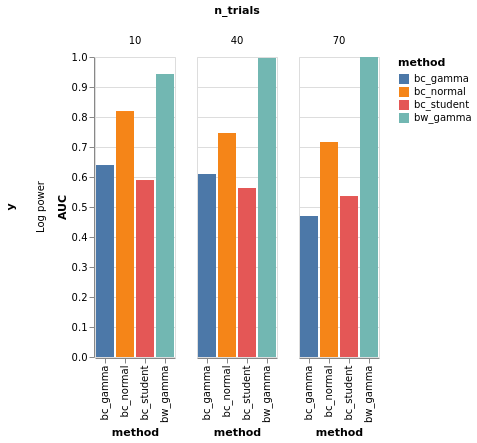

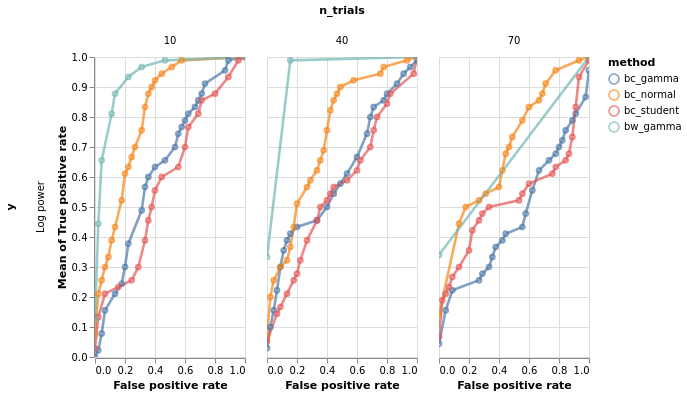

In [14]:
df = model_comparison.make_roc_auc(res, binary=False, groups=('method', 'y', 'n_trials'))

bars, roc = model_comparison.plot_roc(df)
bars.facet(column='n_trials', row='y').properties().display()
roc.facet(column='n_trials', row='y').properties()
# NBVAL_SKIP